**Performance Analysis of Statistical, Machine Learning and Deep Learning Models in Long-Term Forecasting of Solar Power Production**

The forecasting of solar power production for different time horizons (1, 3, 5, and 15 days ahead) is performed using both 
multivariate and univariate models. The attached figure illustrates the model, input variables, and output variables 
involved in the forecasting process. The notebook presents the predictions for the 15-day ahead horizon first, followed by 
the 3-day ahead, 5-day ahead, and finally the day-ahead predictions.Initially, the performance of three different univariate models (ARIMA, Univariate SVR, and Univariate LSTM) is evaluated. 
The best-performing univariate model is then analyzed by incorporating additional input variables to observe how the accuracy of the model changes with varying numbers of input variables. Additionally, ensemble models (Random Forest and ARIMA-LSTM) are tested using the same datasets to determine if combining different models can enhance the prediction accuracy.

The sequence of models used in the analysis is as follows:

1. ARIMA Model
2. SVR Model
3. Univariate LSTM Model
4. Multivariate LSTM Model
5. Stacked LSTM Model
6. GRU Model
7. Stacked GRU Model
8. Encoder-Decoder LSTM Model
9. Bi-Directional LSTM Model
10. ARIMA-LSTM (Hybrid Model)
11. Random Forest Model (Ensemble Model)

These models are employed to assess their respective forecasting capabilities and determine the most accurate approach for solar power production prediction provided with limited historical data
Effort are kept to make a apple-to-apple comparision of the models. Basic structure of the model is compared without new feature engineering and hyper parameter tuning.
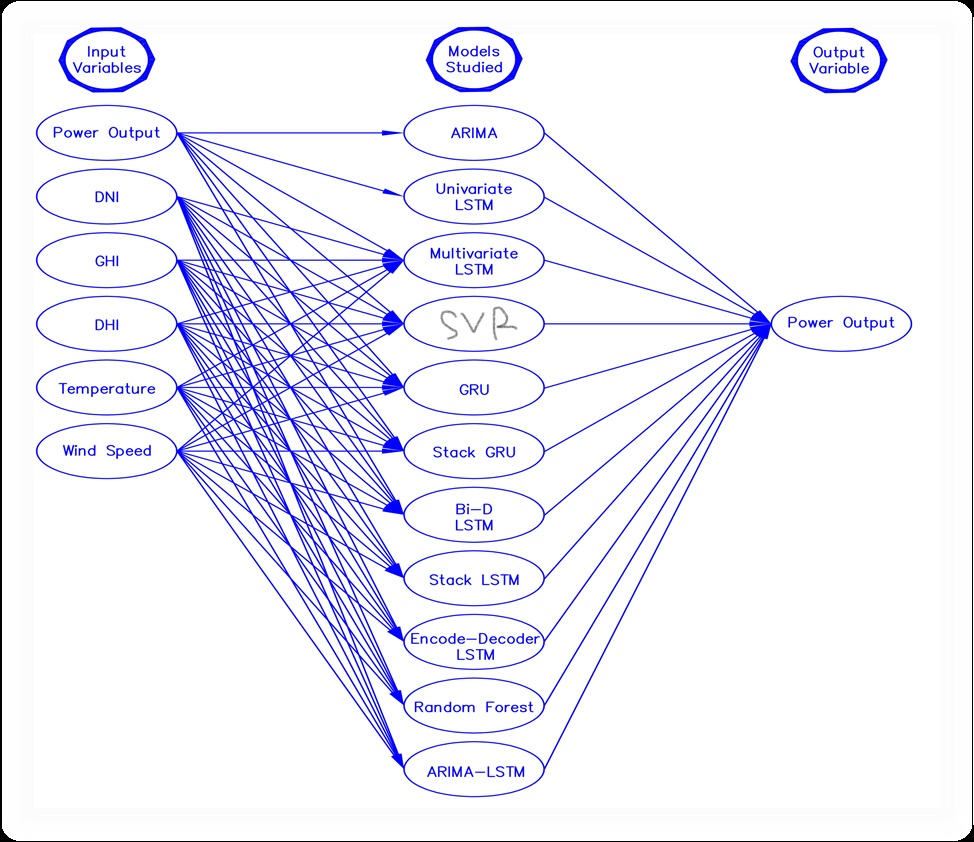

**A. 15 - Days Ahead Forecasting (Prediction horizon= 15 days)**

1. ARIMA Model

This is a univariate model, where model is trained and tested for power output data(kWh).

In [17]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the data. 
#The data is obtained from a SAM software for a 100-kW solar plant
#The ouput data is hourly kWh data from that planned solar plant for a period of one year


df = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')

df

,output
Date Time,
01.01.2010 00:00:00,0.0
01.01.2010 01:00:00,0.0
01.01.2010 02:00:00,0.0
01.01.2010 03:00:00,0.0
01.01.2010 04:00:00,0.0
...,...
31.12.2010 19:00:00,0.0
31.12.2010 20:00:00,0.0
31.12.2010 21:00:00,0.0


In [18]:
#TRAINING/TESTING DATA


#Test-Train split (Due to limited data , the datasets is not considered for dividing for validation)
train = df.iloc[:8400,0]
test = df.iloc[8400:,0]


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64837.206, Time=7.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83469.536, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68189.189, Time=0.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75361.998, Time=1.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87294.797, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=66450.474, Time=2.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64841.698, Time=4.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64841.915, Time=5.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=64739.208, Time=23.88 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66111.193, Time=9.48 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=64820.642, Time=27.17 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64728.981, Time=22.19 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=65923.978, Time=7.88 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=64735.069, Time=20.92 sec
 ARIMA(2,0,5)(0

ARIMA(order=(3, 0, 5), scoring_args={}, suppress_warnings=True)

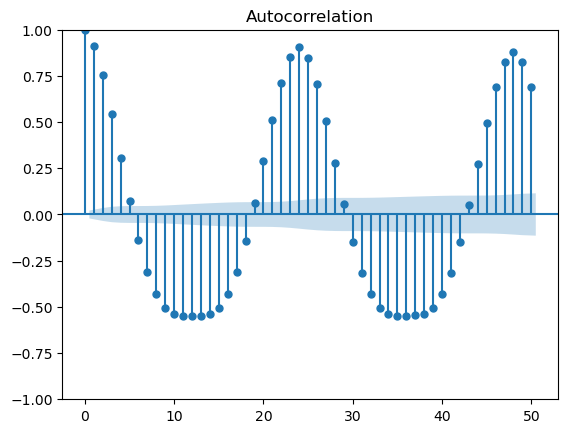

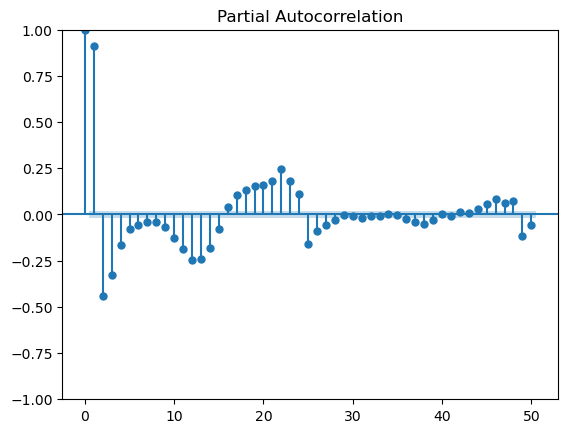

In [23]:
 #Finding the Parameters (p,d,q)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=50)

plot_pacf(train, lags=50)


from pmdarima import auto_arima

auto_arima(df, trace = True)

In [24]:
# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

A_Model = ARIMA(train, order = (3,0,5))  #using p, d,q obtained from previous cell

predictor = A_Model.fit()

predictor.summary()
print(predictor.summary())

Predicted_results = predictor.predict(start = len(train), end = len(train)+len(test) - 1, typ = 'levels')

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 output   No. Observations:                 8400
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -30897.413
Date:                Sun, 26 Nov 2023   AIC                          61814.827
Time:                        11:01:23   BIC                          61885.187
Sample:                             0   HQIC                         61838.851
                               - 8400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1037      0.296     71.361      0.000      20.524      21.683
ar.L1          1.2647      1.504      0.841      0.400      -1.683       4.212
ar.L2          0.1228      2.749      0.045      0.9

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


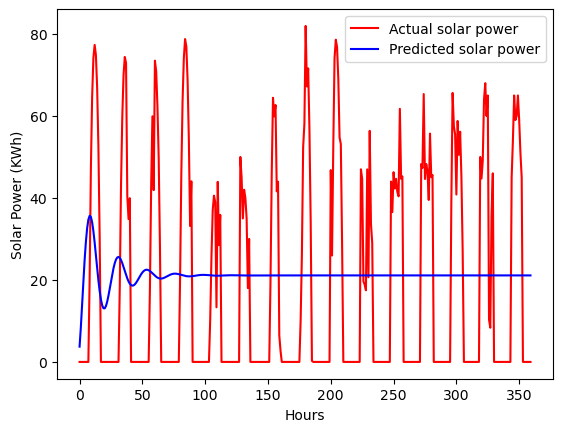

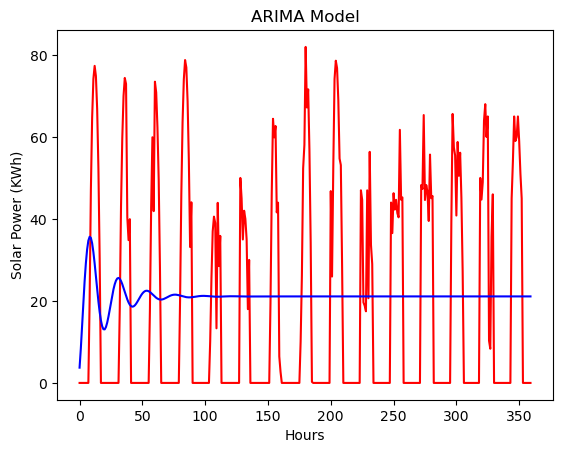

In [25]:
#Plotting result

# Generate arrays of hours
hours_test = np.arange(len(test))
hours_predicted = np.arange(len(Predicted_results))

plt.plot(hours_test, test, color='red', label='Actual solar power')
plt.plot(hours_predicted, Predicted_results, color='blue', label='Predicted solar power')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.legend()
plt.show()

#This is just for picture that goes to a paper
plt.plot(hours_test, test, color='red')
plt.plot(hours_predicted, Predicted_results, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('ARIMA Model')
plt.show()


In [38]:
#Model Accuracy test

import numpy as np
from sklearn.metrics import mean_squared_error

# Ensuring both test and Predicted_results are numpy arrays
test_array = np.array(test)
predicted_results_array = np.array(Predicted_results)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test_array, predicted_results_array))

# Calculating R-squared
r_squared = 1 - (np.sum((test_array - predicted_results_array)**2) / np.sum((test_array - np.mean(test_array))**2))

#calculating MAE
# Calculate MAE
mae = mean_absolute_error(test, Predicted_results)

# Calculating MAPE 
non_zero_mask = test_array != 0
mape = np.mean(np.abs((test_array[non_zero_mask] - predicted_results_array[non_zero_mask]) / test_array[non_zero_mask])) * 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 25.41
R-Squared: 0.01
MAPE: 116.56
MAE: 23.38


2. SVR Univariate Model

RMSE: 20.18
r-squared: 0.37
MAPE: 136.25
MAE: 17.88


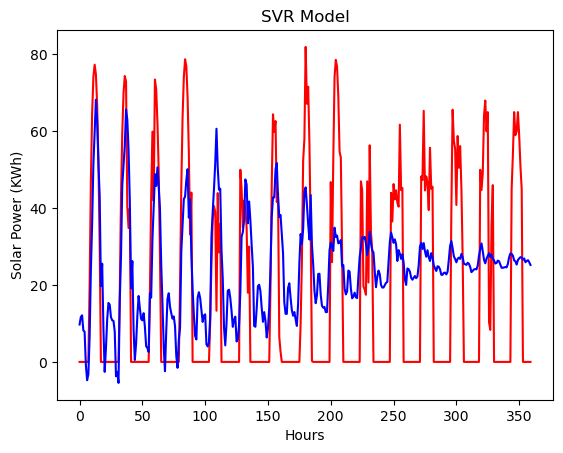

In [4]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

def create_dataset(X, y, time_steps=360):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

data = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')


target = 'output'


y = data[target].values

# Preprocessing
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

# test-train
train_data, test_data = y[:-360], y[-360:]

# Reshape the input data for SVR
time_steps = 360
X_train, y_train = create_dataset(train_data, train_data, time_steps)
y_test = test_data

# Flatten the training set for SVR
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(-1)

# Build the SVR model
model = SVR(kernel='poly', C=50, gamma=0.8, epsilon=0.5)


model.fit(X_train, y_train)

# Create a loop to iteratively predict each of the 360 time steps
predictions = model.predict(X_train[-1].reshape(1,-1))
for i in range(359):  
    new_pred = model.predict(np.append(X_train[-1][i+1:],predictions).reshape(1,-1))
    predictions = np.append(predictions, new_pred)


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions) 
r2_test = r2_score(y_test, predictions)


non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - predictions[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"r-squared: {r2_test:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")


#This is for picture that goes to a paper

hours_test = np.arange(len(y_test))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[-360:], color='red')
plt.plot(hours_predicted, predictions[-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('SVR Model')
plt.show()


3. Univariate LSTM

In [13]:

from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')


# test-train split
train_data = df.iloc[:8400, 0:1].values
test_data = df.iloc[8400:8760, 0:1].values  # Next 360 hours

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create training sets
X_train = []
y_train = []
window_size = 360

for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled[i-window_size:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


model = Sequential()
model.add(LSTM(units=16, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

model.save('LSTM')

# Load the saved model
from keras.models import load_model
model = load_model('LSTM')

inputs = train_scaled[-window_size:]
inputs = inputs.reshape(-1, 1)
inputs = np.reshape(inputs, (1, inputs.shape[0], 1))

predictions = []
for _ in range(360):  # Predict next 360 hours
    prediction = model.predict(inputs)
    predictions.append(prediction[0, 0])
    inputs = np.roll(inputs, -1)
    inputs[0, -1, 0] = prediction

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Flatten the test data
test_data_flattened = test_data.flatten()





Epoch 1/30
252/252 [==============================] - 24s 86ms/step - loss: 0.0424
Epoch 2/30
252/252 [==============================] - 26s 101ms/step - loss: 0.0129
Epoch 3/30
252/252 [==============================] - 29s 115ms/step - loss: 0.0108
Epoch 4/30
252/252 [==============================] - 29s 117ms/step - loss: 0.0098
Epoch 5/30
252/252 [==============================] - 29s 117ms/step - loss: 0.0093
Epoch 6/30
252/252 [==============================] - 31s 124ms/step - loss: 0.0088
Epoch 7/30
252/252 [==============================] - 29s 115ms/step - loss: 0.0088
Epoch 8/30
252/252 [==============================] - 29s 116ms/step - loss: 0.0086
Epoch 9/30
252/252 [==============================] - 29s 116ms/step - loss: 0.0084
Epoch 10/30
252/252 [==============================] - 32s 128ms/step - loss: 0.0084
Epoch 11/30
252/252 [==============================] - 31s 125ms/step - loss: 0.0082
Epoch 12/30
252/252 [==============================] - 32s 127ms/step - los

INFO:tensorflow:Assets written to: LSTM\assets


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 74ms/step


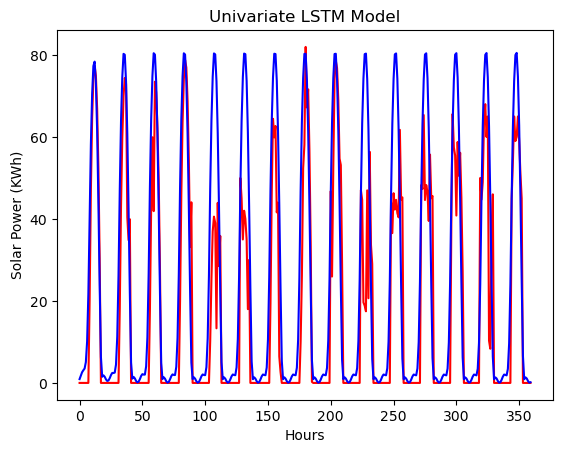

In [18]:
#This is just for picture that goes to a paper

hours_test = np.arange(len(test_data_flattened))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, test_data_flattened, color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Univariate LSTM Model')
plt.show()

In [19]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Calculate MAE
mae = mean_absolute_error(test_data, predictions)

# Calculate NMAE
#nmae = mae / 100
r2_test = r2_score(test_data, predictions)


non_zero_mask = test_data != 0
mape = np.mean(np.abs((test_data[non_zero_mask] - predictions[non_zero_mask]) / test_data[non_zero_mask])) * 100

print("RMSE:", rmse)
print("MAE:", mae)
#print("NMAE:", nmae)
print("R-Squared:", r2_test)
print(f"MAPE: {mape:.2f}")

RMSE: 16.28557650602625
MAE: 10.025228201394274
R-Squared: 0.5927533317904291
MAPE: 87.32



The LSTM (Deep Learning) model outperformed the ARIMA (Statistical) and SVR (Machine Learning) models in terms of performance. This indicates that the LSTM model was more effective in forecasting solar power production. To further enhance the model's performance, a multivariate LSTM model was evaluated by incorporating additional input variables. The goal is to examine how the inclusion of these variables impacted the accuracy and predictive capabilities of the model.

Things to note for these models comparisions so far: Comparisons were drawn between ARIMA, SVR, and LSTM models using limited dataset comprising one year of hourly data. This evaluation was conducted without hyperparameter tuning or feature engineering, primarily to assess the models' performance under conditions of limited dataset size and computational memory constraints. Therefore, hyperparameter tuning was not incorporated. It's important to note that the outcomes could vary with the inclusion of a broader dataset and the application of hyperparameter tuning. 

4. Multivariate LSTM

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')


feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'



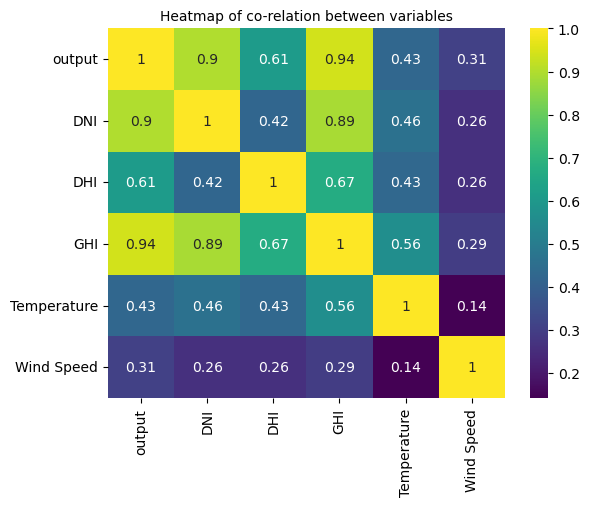

In [21]:
#plotting a correlation heatmap between variables
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=10)
plt.show()

12/12 [==============================] - 0s 2ms/step
MAPE: 44.39
RMSE: 14.20
MAE: 7.29


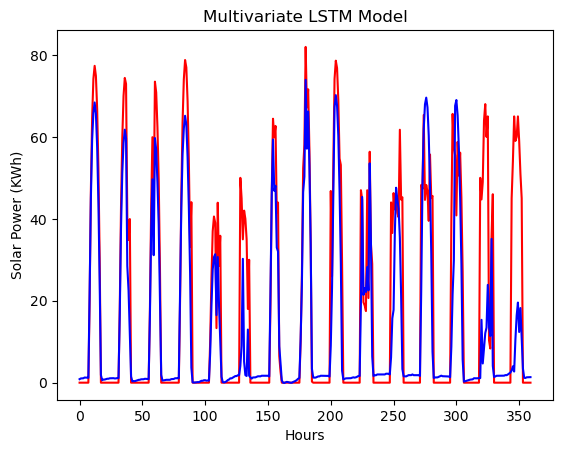

In [22]:


training_data = data[:-360]
testing_data = data[-360:]


X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy 
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])


# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")

print(f"MAE: {mae:.2f}")

hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Multivariate LSTM Model')
plt.show()



5. Stacked LSTM model (multivariate model)

12/12 [==============================] - 1s 2ms/step
MAPE: 40.86
RMSE: 14.42
MAE: 7.04


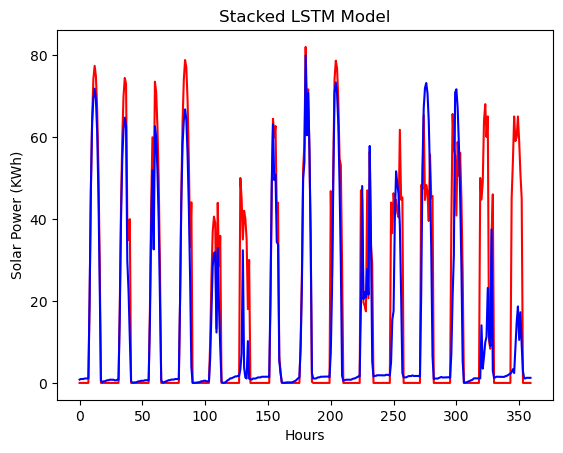

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')


feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Split the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)


next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)



# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")

hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Stacked LSTM Model')
plt.show()




6. GRU Model 

12/12 [==============================] - 0s 2ms/step
MAPE: 43.77
RMSE: 14.17
MAE: 6.90


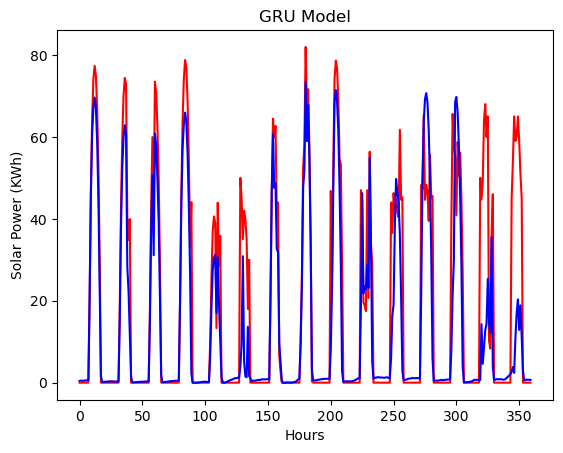

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')


feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'


training_data = data[:-360]
testing_data = data[-360:]


X_train = training_data[feature_variables]
y_train = training_data[target_variable]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])


X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)


predictions = model.predict(X_test_reshaped)
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))

mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")

print(f"MAE: {mae:.2f}")


hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('GRU Model')
plt.show()




7. Stacked GRU model (multivariate model)

12/12 [==============================] - 0s 3ms/step
MAPE: 40.08
RMSE: 14.51
MAE: 6.85


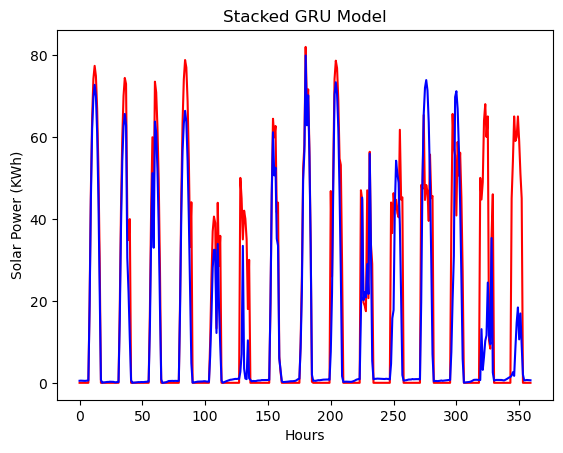

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

training_data = data[:-360]
testing_data = data[-360:]

X_train = training_data[feature_variables]
y_train = training_data[target_variable]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])


X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))

model.add(GRU(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)



# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Stacked GRU Model')
plt.show()


8. Encoder-Decoder LSTM

12/12 [==============================] - 0s 2ms/step
RMSE: 14.49
MAE: 7.33
MAPE: 41.25


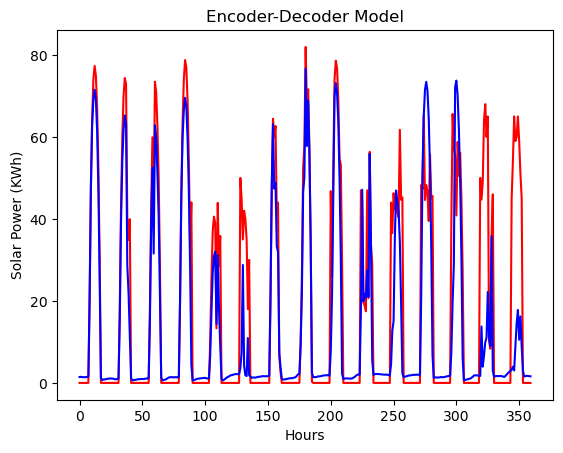

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

training_data = data[:-360]
testing_data = data[-360:]

X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshape data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Create the Encoder-Decoder LSTM model
model = Sequential()
# Encoder
model.add(LSTM(16, activation='relu', input_shape=(1, len(feature_variables)), return_sequences=False))
model.add(RepeatVector(1))  # Replicate the encoder output for each time step in the output sequence
# Decoder
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predict the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1, 1)  # Flatten predictions to 1D

# DataFrame to store predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print accuracy results
print(f"RMSE: {rmse:.2f}")

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")

#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Encoder-Decoder Model')
plt.show()


9. Bidirectional LSTM

12/12 [==============================] - 0s 2ms/step
MAPE: 43.25
RMSE: 14.21
MAE: 7.13


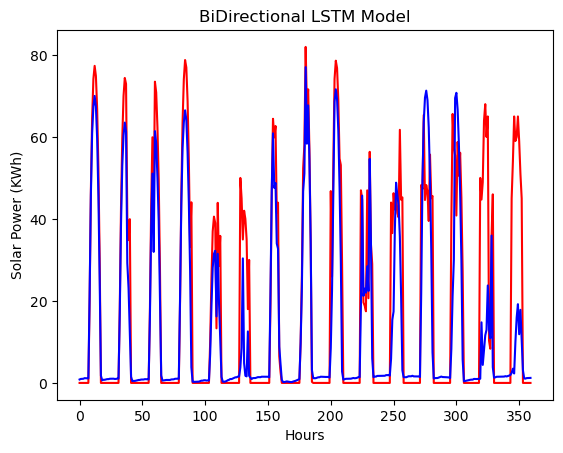

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')


feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Split the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(16, activation='relu', return_sequences=False), input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

predictions = model.predict(X_test_reshaped)


next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))

mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('BiDirectional LSTM Model')
plt.show()


10. ARIMA-LSTM (univariate)- Hybrid Model

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Epoch 1/30
263/263 [==============================] - 3s 3ms/step - loss: 0.9995
Epoch 2/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9990
Epoch 3/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9987
Epoch 4/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9990
Epoch 5/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9989
Epoch 6/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9988
Epoch 7/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9988
Epoch 8/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9987
Epoch 9/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9987
Epoch 10/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9987
Epoch 11/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9986
Epoch 12/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9986
Epoch 13/30
263/263 [====

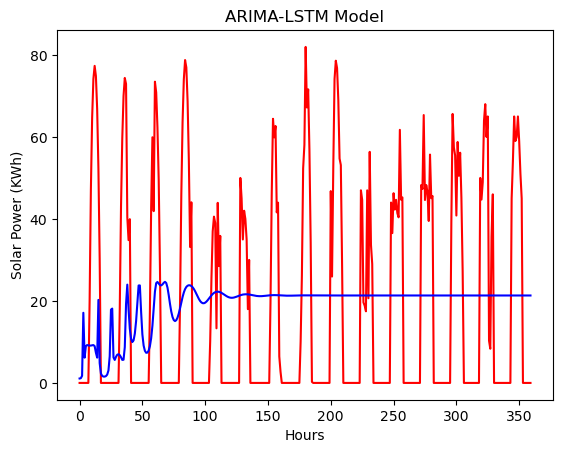

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
train_size = len(X) - 360
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train an ARIMA model
arima_model = ARIMA(y_train, order=(3, 0, 5))
arima_model_fit = arima_model.fit()

# Use the ARIMA model to forecast the future values
arima_forecast = arima_model_fit.forecast(steps=len(X_test))

# Reshape arima_forecast to match the shape of X_test
arima_forecast = arima_forecast.reshape(-1, 1)

# Append the ARIMA forecasts as additional features to X_test
X_test_augmented = np.hstack((X_test, arima_forecast))

# Use the ARIMA model to forecast the future values for the training data
arima_forecast_train = arima_model_fit.forecast(steps=len(X_train))

# Reshape arima_forecast_train to match the shape of X_train
arima_forecast_train = arima_forecast_train.reshape(-1, 1)

# Append the ARIMA forecasts as additional features to X_train
X_train_augmented = np.hstack((X_train, arima_forecast_train))

# Preprocessing
scaler_X = StandardScaler()
X_train_augmented = scaler_X.fit_transform(X_train_augmented)
X_test_augmented = scaler_X.transform(X_test_augmented)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape the input data for LSTM
X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape[0], 1, X_train_augmented.shape[1])
X_test_augmented = X_test_augmented.reshape(X_test_augmented.shape[0], 1, X_test_augmented.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=16, input_shape=(1, X_train_augmented.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_augmented, y_train, epochs=30, batch_size=32, verbose=1)

# Use the trained model to predict the output values for the first 360 hours of the test set
predictions = model.predict(X_test_augmented[:360])
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the y_test to get it back to the original scale
y_test = scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test[:360], predictions))
nmae = mean_absolute_error(y_test[:360], predictions) / 100
r2_test = r2_score(y_test[:360], predictions)

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r2_test:.2f}")


hours_test = np.arange(len(y_test[:360]))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[:360], color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('ARIMA-LSTM Model')
plt.show()


11. Random Forest(Multivariate LSTM)

RMSE: 14.56
MAE: 6.72
MAPE: 41.78%


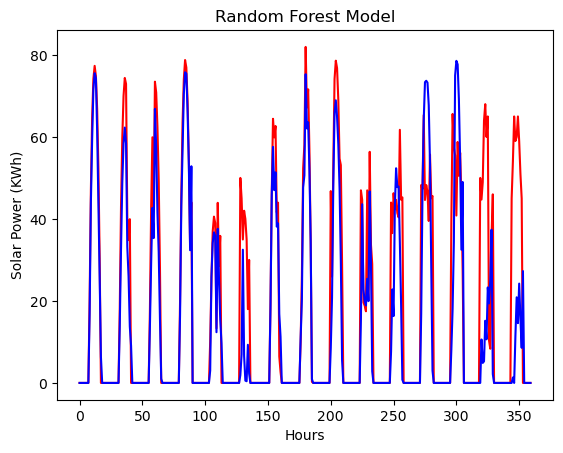

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Split data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

X_train = training_data[feature_variables]
y_train = training_data[target_variable]
X_test = testing_data[feature_variables]
y_test = testing_data[target_variable]

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)

# Predict the next 360 hours based on the testing data
predictions = model.predict(X_test_scaled)

# DataFrame to store predictions
next360_predictions = pd.DataFrame(predictions, index=testing_data.index, columns=[target_variable])

# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)


# Calculate MAPE
non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - predictions[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Print accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


#fOR BETTER PLOT
hours_test = np.arange(len(y_test))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[-360:], color='red')
plt.plot(hours_predicted, predictions[-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Random Forest Model')
plt.show()


**B. 3 days ahead prediction**

1. Random Forest

RMSE: 6.99
MAE: 3.74
MAPE: 20.07


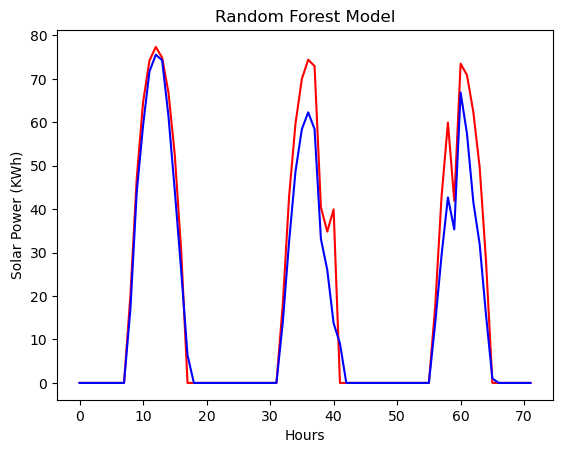

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define feature and target variables
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'


# Split the dataset into a training set and a test set
training_data = data[:-360]
testing_data = data[-360:-288]

# Split into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]
X_test = testing_data[feature_variables]
y_test = testing_data[target_variable]

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)

# Predict the next 72 hours based on the testing data
predictions = model.predict(X_test_scaled)

# DataFrame to store predictions
next360_predictions = pd.DataFrame(predictions, index=testing_data.index, columns=[target_variable])


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))

mae = mean_absolute_error(y_test, predictions)


# Calculate MAPE
non_zero_mask = y_test != 0

mape = np.mean(np.abs((y_test[non_zero_mask] - predictions[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Print accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(y_test))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[-360:], color='red')
plt.plot(hours_predicted, predictions[-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Random Forest Model')
plt.show()


2. Stacked LSTM (Multivariate)

3/3 [==============================] - 0s 3ms/step
MAPE: 18.82
RMSE: 6.53
MAE: 3.85


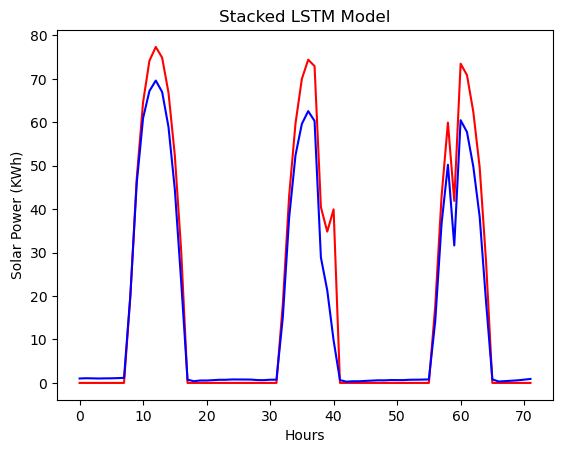

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 72 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")

print(f"MAE: {mae:.2f}")

hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Stacked LSTM Model')
plt.show()




3. Stacked GRU (Multivariate)

3/3 [==============================] - 0s 2ms/step
MAPE: 16.76
RMSE: 5.54
MAE: 3.14


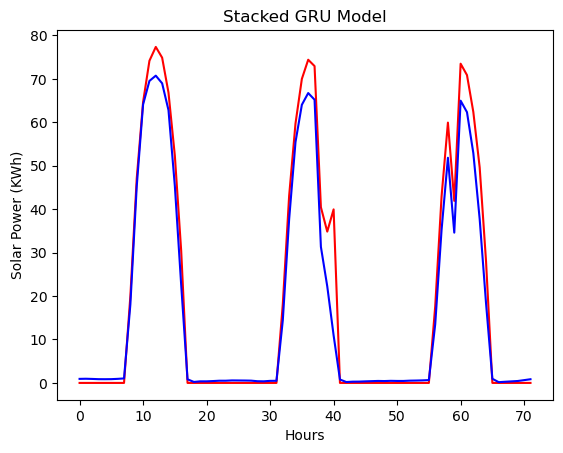

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]


# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))

model.add(GRU(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 72 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Stacked GRU Model')
plt.show()


4. Encoder-Decoder LSTM

3/3 [==============================] - 0s 3ms/step
RMSE: 5.80
MAE: 3.50
MAPE: 15.95


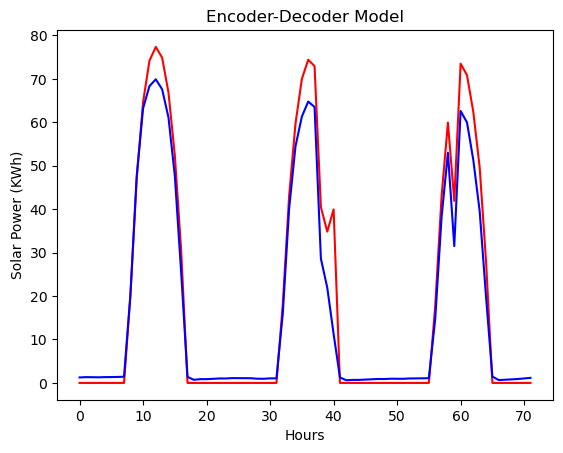

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define feature and target variables
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Split into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshape data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Create the Encoder-Decoder LSTM model
model = Sequential()
# Encoder
model.add(LSTM(16, activation='relu', input_shape=(1, len(feature_variables)), return_sequences=False))
model.add(RepeatVector(1))  # Replicate the encoder output for each time step in the output sequence
# Decoder
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predict the next 72 hours based on the testing data
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1, 1)  # Flatten predictions to 1D

# DataFrame to store predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)



# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")

#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Encoder-Decoder Model')
plt.show()


5. Bi-Directional LSTM

3/3 [==============================] - 0s 3ms/step
MAPE: 16.63
RMSE: 6.01
MAE: 3.48


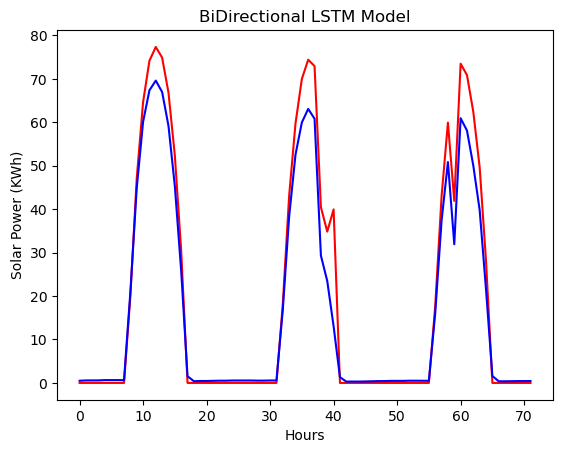

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]


# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(16, activation='relu', return_sequences=False), input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 72 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / 100
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('BiDirectional LSTM Model')
plt.show()


6. Multivariate LSTM

3/3 [==============================] - 0s 1ms/step
MAPE: 17.91
RMSE: 6.53
MAE: 4.17


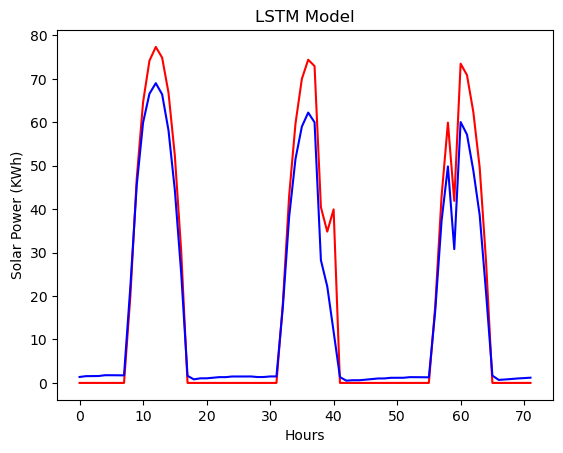

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')
# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 72 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])
#nmae = mae / 100


# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")

print(f"MAE: {mae:.2f}")
#print(f"NMAE: {nmae:.2f}")

hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('LSTM Model')
plt.show()



7. GRU Model

3/3 [==============================] - 0s 2ms/step
MAPE: 16.20
RMSE: 6.00
MAE: 3.66


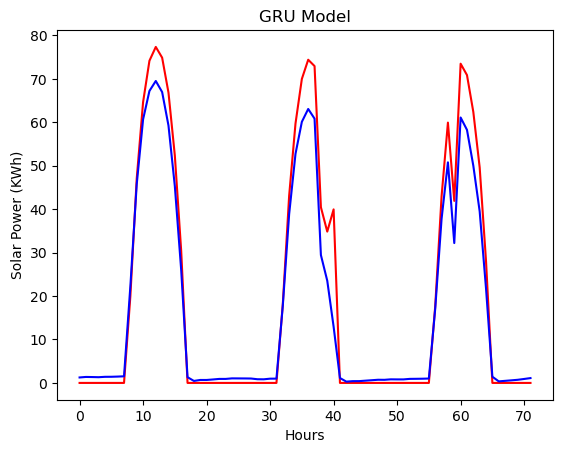

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the GRU model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 72 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-360:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-360:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('GRU Model')
plt.show()




8. ARIMA Model (Univariate Model)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64837.206, Time=8.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83469.536, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68189.189, Time=0.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75361.998, Time=1.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87294.797, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=66450.474, Time=3.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64841.698, Time=5.92 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64841.915, Time=8.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=64739.208, Time=16.51 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66111.193, Time=8.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=64820.642, Time=25.31 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64728.981, Time=30.44 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=65923.978, Time=16.47 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=64735.069, Time=29.44 sec
 ARIMA(2,0,5)(

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 output   No. Observations:                 8400
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -30897.413
Date:                Sun, 26 Nov 2023   AIC                          61814.827
Time:                        13:46:24   BIC                          61885.187
Sample:                    01-01-2010   HQIC                         61838.851
                         - 12-16-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1037      0.296     71.361      0.000      20.524      21.683
ar.L1          1.2647      1.504      0.841      0.400      -1.683       4.212
ar.L2          0.1228      2.749      0.045      0.9

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


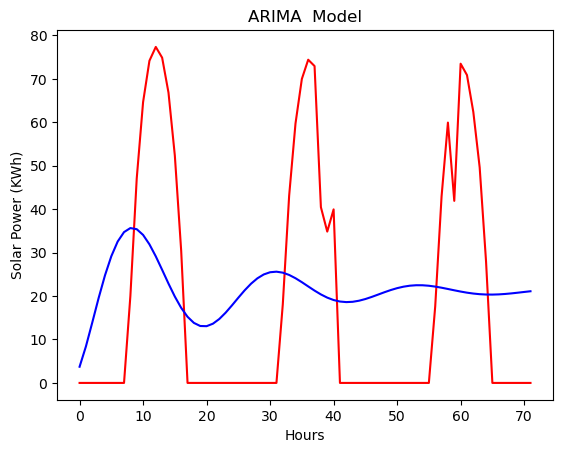

In [37]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data

df = pd.read_csv(r"C:\Users\ashis\Downloads\6\DProbabilistic forecasting\datamv.csv", usecols=[0, 1], index_col=0, parse_dates=[0], dayfirst=True)
df = pd.DataFrame(df['output'])

train = df.iloc[:8400, 0]
test = df.iloc[8400:, 0]

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)

#Decomp_results.plot()

#Decomp_results.seasonal.plot()

# Finding the Parameters (p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot_acf(train, lags=50)

#plot_pacf(train, lags=50)

from pmdarima import auto_arima

auto_arima(df, trace=True)

# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

A_Model = ARIMA(train, order=(3, 0, 5))

predictor = A_Model.fit()

predictor.summary()
print(predictor.summary())

# Predicting the first 72 hours
Predicted_results = predictor.predict(start=len(train), end=len(train) + 71, typ='levels')


nmae = np.mean(np.abs(Predicted_results - test[:72])) / 100
r2_test = r2_score(test[:72], Predicted_results)
#r_squared = 1 - (np.sum((test[:72] - Predicted_results) ** 2) / np.sum((test[:72] - np.mean(test[:72])) ** 2))
rmse = np.sqrt(mean_squared_error(test[:72], Predicted_results))
# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r2_test:.2f}")


hours_test = np.arange(len(test[:72]))
hours_predicted = np.arange(len(Predicted_results))

plt.plot(hours_test, test[:72], color='red')
plt.plot(hours_predicted, Predicted_results, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('ARIMA  Model')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



#nmae = np.mean(np.abs(Predicted_results - test)) / 100

r_squared = 1 - (np.sum((test[:72] - Predicted_results)**2) / np.sum((test[:72] - np.mean(test[:72]))**2))


rmse = np.sqrt(mean_squared_error(test[:72], Predicted_results))

non_zero_mask = test != 0

mape = np.mean(np.abs((test[:72][non_zero_mask] - Predicted_results[non_zero_mask]) / test[:72][non_zero_mask])) * 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r_squared:.2f}")
print(f"MAPE: {mape:.2f}")




RMSE: 26.61
R-Squared: 0.08
MAPE: 54.97


9. Univariate LSTM Model

Epoch 1/30
252/252 [==============================] - 36s 131ms/step - loss: 0.0554
Epoch 2/30
252/252 [==============================] - 34s 134ms/step - loss: 0.0128
Epoch 3/30
252/252 [==============================] - 33s 132ms/step - loss: 0.0105
Epoch 4/30
252/252 [==============================] - 34s 133ms/step - loss: 0.0100
Epoch 5/30
252/252 [==============================] - 33s 131ms/step - loss: 0.0094
Epoch 6/30
252/252 [==============================] - 33s 130ms/step - loss: 0.0091
Epoch 7/30
252/252 [==============================] - 34s 136ms/step - loss: 0.0087
Epoch 8/30
252/252 [==============================] - 37s 146ms/step - loss: 0.0084
Epoch 9/30
252/252 [==============================] - 35s 140ms/step - loss: 0.0083
Epoch 10/30
252/252 [==============================] - 39s 154ms/step - loss: 0.0083
Epoch 11/30
252/252 [==============================] - 33s 131ms/step - loss: 0.0080
Epoch 12/30
252/252 [==============================] - 32s 128ms/step - lo

INFO:tensorflow:Assets written to: LSTM\assets


1/1 [==============================] - 0s 40ms/step


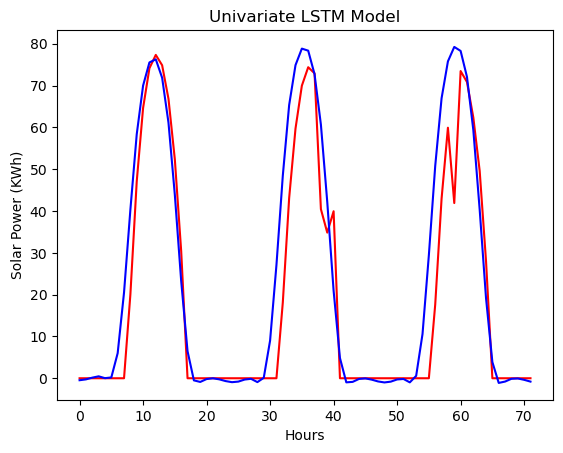

In [41]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')


# test-train split
train_data = df.iloc[:8400, 0:1].values
test_data = df.iloc[8400:8472, 0:1].values  # Next 72 hours

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create training sets
X_train = []
y_train = []
window_size = 360

for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled[i-window_size:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


model = Sequential()
model.add(LSTM(units=16, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

model.save('LSTM')

# Load the saved model
from keras.models import load_model
model = load_model('LSTM')

inputs = train_scaled[-window_size:]
inputs = inputs.reshape(-1, 1)
inputs = np.reshape(inputs, (1, inputs.shape[0], 1))

predictions = []
for _ in range(72):  # Predict next 72 hours
    prediction = model.predict(inputs)
    predictions.append(prediction[0, 0])
    inputs = np.roll(inputs, -1)
    inputs[0, -1, 0] = prediction

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Flatten the test data
test_data_flattened = test_data.flatten()
#This is just for picture that goes to a paper

hours_test = np.arange(len(test_data_flattened))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, test_data_flattened, color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Univariate LSTM Model')
plt.show()




In [42]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Calculate MAE
mae = mean_absolute_error(test_data, predictions)

# Calculate NMAE
#nmae = mae / 100
r2_test = r2_score(test_data, predictions)


non_zero_mask = test_data != 0
mape = np.mean(np.abs((test_data[non_zero_mask] - predictions[non_zero_mask]) / test_data[non_zero_mask])) * 100

print("RMSE:", rmse)
print("MAE:", mae)
#print("NMAE:", nmae)
print("R-Squared:", r2_test)
print(f"MAPE: {mape:.2f}")

RMSE: 11.281380583041978
MAE: 6.44432152369993
R-Squared: 0.8348296476674957
MAPE: 36.79


10 . SVR Univariate Model

RMSE: 14.08
r-squared: 0.74
MAPE: 28.75
MAE: 11.69


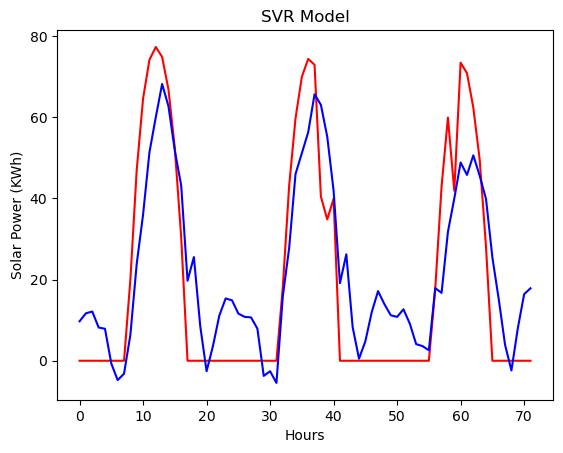

In [51]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

def create_dataset(X, y, time_steps=360):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

data = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')


target = 'output'


y = data[target].values

# Preprocessing
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

# test-train
train_data, test_data = y[:-360], y[-360:-288]

# Reshape the input data for SVR
time_steps = 360
X_train, y_train = create_dataset(train_data, train_data, time_steps)
y_test = test_data

# Flatten the training set for SVR
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(-1)

# Build the SVR model
model = SVR(kernel='poly', C=50, gamma=0.8, epsilon=0.5)


model.fit(X_train, y_train)

# Create a loop to iteratively predict each of the 72 time steps
predictions = model.predict(X_train[-1].reshape(1,-1))
for i in range(71):  
    new_pred = model.predict(np.append(X_train[-1][i+1:],predictions).reshape(1,-1))
    predictions = np.append(predictions, new_pred)


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions) 
r2_test = r2_score(y_test, predictions)


non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - predictions[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"r-squared: {r2_test:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")


#This is for picture that goes to a paper

hours_test = np.arange(len(y_test))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[-72:], color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('SVR Model')
plt.show()


11. ARIMA-LSTM Model

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Epoch 1/30
263/263 [==============================] - 4s 3ms/step - loss: 0.9998
Epoch 2/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9993
Epoch 3/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9989
Epoch 4/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9988
Epoch 5/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9989
Epoch 6/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9987
Epoch 7/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9990
Epoch 8/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9989
Epoch 9/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9989
Epoch 10/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9986
Epoch 11/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9988
Epoch 12/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9990
Epoch 13/30
263/263 [====

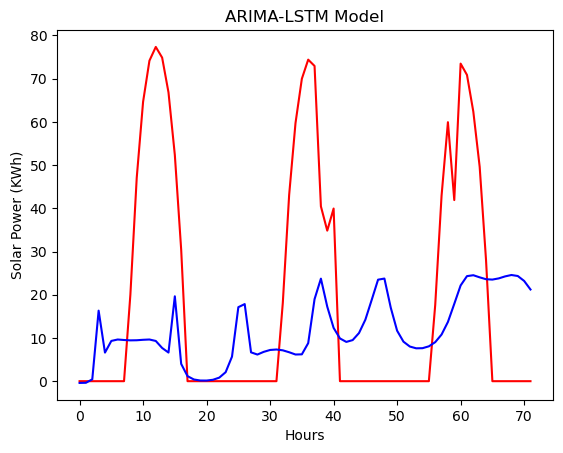

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
train_size = len(X) - 360
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train an ARIMA model
arima_model = ARIMA(y_train, order=(3, 0, 5))
arima_model_fit = arima_model.fit()

# Use the ARIMA model to forecast the future values
arima_forecast = arima_model_fit.forecast(steps=len(X_test))

# Reshape arima_forecast to match the shape of X_test
arima_forecast = arima_forecast.reshape(-1, 1)

# Append the ARIMA forecasts as additional features to X_test
X_test_augmented = np.hstack((X_test, arima_forecast))

# Use the ARIMA model to forecast the future values for the training data
arima_forecast_train = arima_model_fit.forecast(steps=len(X_train))

# Reshape arima_forecast_train to match the shape of X_train
arima_forecast_train = arima_forecast_train.reshape(-1, 1)

# Append the ARIMA forecasts as additional features to X_train
X_train_augmented = np.hstack((X_train, arima_forecast_train))

# Preprocessing
scaler_X = StandardScaler()
X_train_augmented = scaler_X.fit_transform(X_train_augmented)
X_test_augmented = scaler_X.transform(X_test_augmented)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape the input data for LSTM
X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape[0], 1, X_train_augmented.shape[1])
X_test_augmented = X_test_augmented.reshape(X_test_augmented.shape[0], 1, X_test_augmented.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=16, input_shape=(1, X_train_augmented.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_augmented, y_train, epochs=30, batch_size=32, verbose=1)

# Use the trained model to predict the output values for the first 72 hours of the test set
predictions = model.predict(X_test_augmented[:72])
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the y_test to get it back to the original scale
y_test = scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test[:72], predictions))
nmae = mean_absolute_error(y_test[:72], predictions) / 100
r2_test = r2_score(y_test[:72], predictions)

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r2_test:.2f}")


hours_test = np.arange(len(y_test[:72]))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[:72], color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('ARIMA-LSTM Model')
plt.show()

**C. 5 Days ahead Prediction**

1. Random Forest

RMSE: 6.01
MAE: 3.01
MAPE: 17.40%


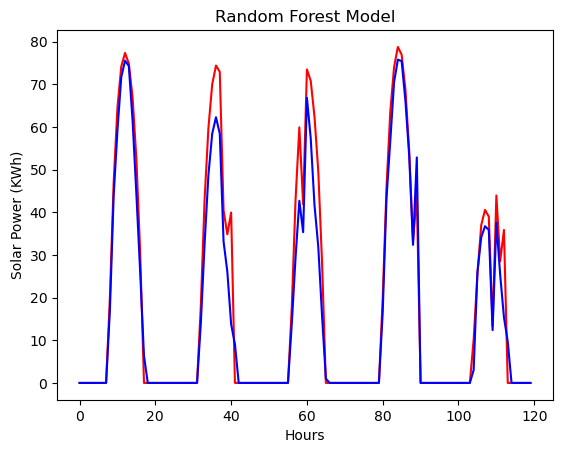

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define feature and target variables
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'


# Split the dataset into a training set and a test set
training_data = data[:-360]
testing_data = data[-360:-240]

# Split into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]
X_test = testing_data[feature_variables]
y_test = testing_data[target_variable]

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)

# Predict the next 360 hours based on the testing data
predictions = model.predict(X_test_scaled)

# DataFrame to store predictions
next360_predictions = pd.DataFrame(predictions, index=testing_data.index, columns=[target_variable])

# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
#nmae = mae / np.mean(y_test)  # Normalized MAE

# Calculate MAPE
non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - predictions[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Print accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


#fOR BETTER PLOT
hours_test = np.arange(len(y_test))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[-120:], color='red')
plt.plot(hours_predicted, predictions[-120:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Random Forest Model')
plt.show()


2. Stacked LSTM (Multivariate Model)

4/4 [==============================] - 0s 3ms/step
MAPE: 21.91
RMSE: 7.36
MAE: 4.15


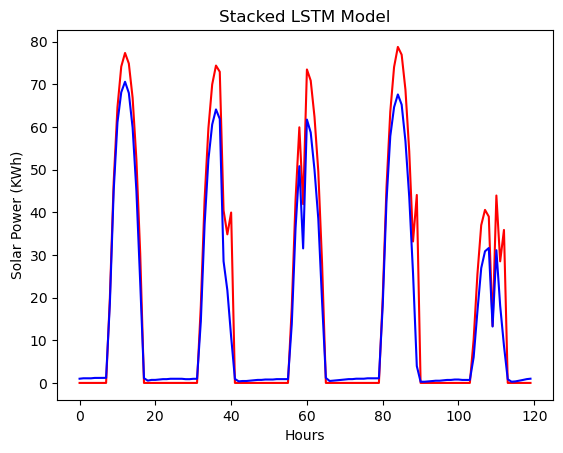

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)



# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")

hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-120:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-120:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Stacked LSTM Model')
plt.show()




3. Stacked GRU

4/4 [==============================] - 0s 3ms/step
MAPE: 20.19
RMSE: 7.08
MAE: 3.85


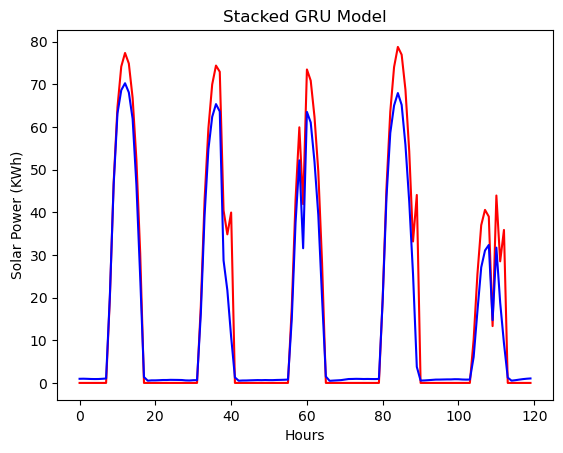

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]


# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))

model.add(GRU(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)



# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-120:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-120:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Stacked GRU Model')
plt.show()


4. Encoder-Decoder LSTM

4/4 [==============================] - 0s 4ms/step
RMSE: 7.06
MAE: 3.85
MAPE: 20.94


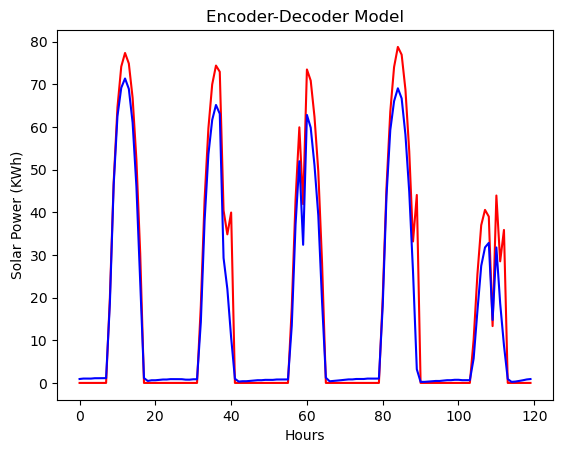

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define feature and target variables
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Split into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshape data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Create the Encoder-Decoder LSTM model
model = Sequential()
# Encoder
model.add(LSTM(16, activation='relu', input_shape=(1, len(feature_variables)), return_sequences=False))
model.add(RepeatVector(1))  # Replicate the encoder output for each time step in the output sequence
# Decoder
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predict the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1, 1)  # Flatten predictions to 1D

# DataFrame to store predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")

#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-120:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-120:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Encoder-Decoder Model')
plt.show()


5. Bi-Directional LSTM

4/4 [==============================] - 0s 3ms/step
MAPE: 19.30
RMSE: 7.06
MAE: 3.97


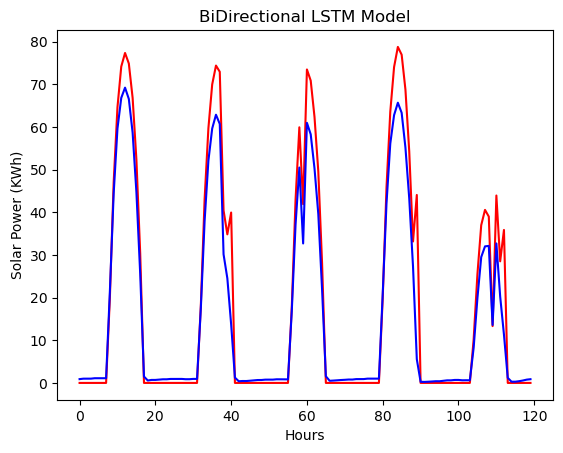

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional


data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]


# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(16, activation='relu', return_sequences=False), input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / 100
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-120:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-120:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('BiDirectional LSTM Model')
plt.show()


6. Multivariate LSTM

4/4 [==============================] - 0s 3ms/step
MAPE: 20.62
RMSE: 7.27
MAE: 3.92


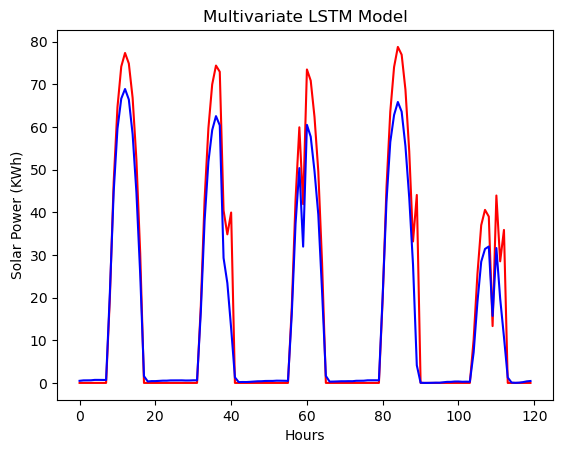

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')
# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)

# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])
#nmae = mae / 100


# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")

print(f"MAE: {mae:.2f}")
#print(f"NMAE: {nmae:.2f}")

hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-120:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-120:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Multivariate LSTM Model')
plt.show()



7. GRU Multivariate Model

4/4 [==============================] - 0s 2ms/step
MAPE: 20.30
RMSE: 7.41
MAE: 4.27


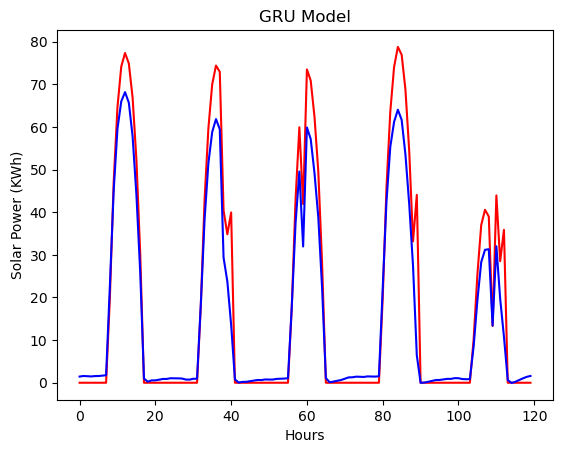

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the GRU model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")



hours_test = np.arange(len(testing_data[target_variable]))
hours_predicted = np.arange(len(next360_predictions[target_variable]))

plt.plot(hours_test, testing_data[target_variable][-120:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-120:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('GRU Model')
plt.show()




8. ARIMA Univariate Model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64837.206, Time=7.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83469.536, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68189.189, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75361.998, Time=1.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87294.797, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=66450.474, Time=2.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64841.698, Time=4.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64841.915, Time=5.37 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=64739.208, Time=12.36 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66111.193, Time=5.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=64820.642, Time=15.09 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64728.981, Time=14.78 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=65923.978, Time=7.73 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=64735.069, Time=20.57 sec
 ARIMA(2,0,5)(0

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 output   No. Observations:                 8400
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -30897.413
Date:                Sun, 26 Nov 2023   AIC                          61814.827
Time:                        14:39:26   BIC                          61885.187
Sample:                    01-01-2010   HQIC                         61838.851
                         - 12-16-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1037      0.296     71.361      0.000      20.524      21.683
ar.L1          1.2647      1.504      0.841      0.400      -1.683       4.212
ar.L2          0.1228      2.749      0.045      0.9

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


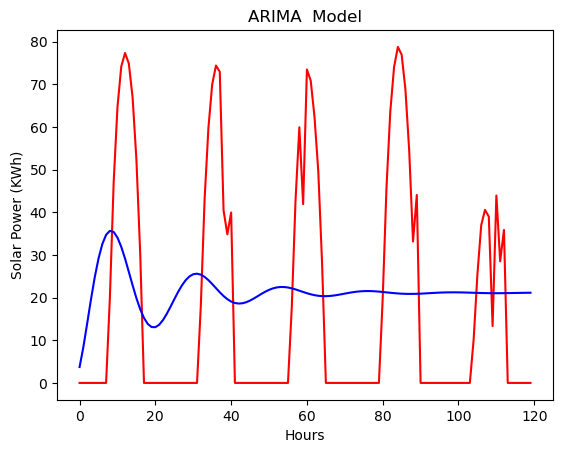

In [59]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data

df = pd.read_csv(r"C:\Users\ashis\Downloads\6\DProbabilistic forecasting\datamv.csv", usecols=[0, 1], index_col=0, parse_dates=[0], dayfirst=True)
df = pd.DataFrame(df['output'])

train = df.iloc[:8400, 0]
test = df.iloc[8400:, 0]

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)

#Decomp_results.plot()

#Decomp_results.seasonal.plot()

# Finding the Parameters (p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot_acf(train, lags=50)

#plot_pacf(train, lags=50)

from pmdarima import auto_arima

auto_arima(df, trace=True)

# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

A_Model = ARIMA(train, order=(3, 0, 5))

predictor = A_Model.fit()

predictor.summary()
print(predictor.summary())

# Predicting the first 120 hours
Predicted_results = predictor.predict(start=len(train), end=len(train) + 119, typ='levels')


nmae = np.mean(np.abs(Predicted_results - test[:120])) / 100
r2_test = r2_score(test[:120], Predicted_results)
#r_squared = 1 - (np.sum((test[:72] - Predicted_results) ** 2) / np.sum((test[:72] - np.mean(test[:72])) ** 2))
rmse = np.sqrt(mean_squared_error(test[:120], Predicted_results))
# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r2_test:.2f}")


hours_test = np.arange(len(test[:120]))
hours_predicted = np.arange(len(Predicted_results))

plt.plot(hours_test, test[:120], color='red')
plt.plot(hours_predicted, Predicted_results, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('ARIMA  Model')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



#nmae = np.mean(np.abs(Predicted_results - test)) / 100

r_squared = 1 - (np.sum((test[:120] - Predicted_results)**2) / np.sum((test[:120] - np.mean(test[:120]))**2))


rmse = np.sqrt(mean_squared_error(test[:120], Predicted_results))

non_zero_mask = test != 0

mape = np.mean(np.abs((test[:120][non_zero_mask] - Predicted_results[non_zero_mask]) / test[:120][non_zero_mask])) * 100

mae = mean_absolute_error(test[:120], Predicted_results)

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r_squared:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 26.11
R-Squared: 0.04
MAPE: 54.13
MAE: 23.43


9. SVR Univarite Model

RMSE: 15.16
r-squared: 0.68
MAPE: 37.08
MAE: 12.49


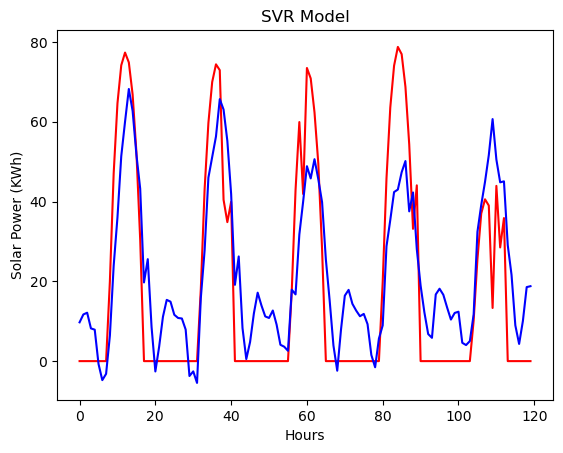

In [63]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

def create_dataset(X, y, time_steps=360):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

data = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')


target = 'output'


y = data[target].values

# Preprocessing
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

# test-train
train_data, test_data = y[:-360], y[-360:-240]

# Reshape the input data for SVR
time_steps = 360
X_train, y_train = create_dataset(train_data, train_data, time_steps)
y_test = test_data

# Flatten the training set for SVR
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(-1)

# Build the SVR model
model = SVR(kernel='poly', C=50, gamma=0.8, epsilon=0.5)


model.fit(X_train, y_train)

# Create a loop to iteratively predict each of the 72 time steps
predictions = model.predict(X_train[-1].reshape(1,-1))
for i in range(119):  
    new_pred = model.predict(np.append(X_train[-1][i+1:],predictions).reshape(1,-1))
    predictions = np.append(predictions, new_pred)


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions) 
r2_test = r2_score(y_test, predictions)


non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - predictions[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"r-squared: {r2_test:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")


#This is for picture that goes to a paper

hours_test = np.arange(len(y_test))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[-120:], color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('SVR Model')
plt.show()


10. Univariate LSTM Model

Epoch 1/30
252/252 [==============================] - 28s 102ms/step - loss: 0.0418
Epoch 2/30
252/252 [==============================] - 31s 122ms/step - loss: 0.0110
Epoch 3/30
252/252 [==============================] - 30s 119ms/step - loss: 0.0094
Epoch 4/30
252/252 [==============================] - 30s 121ms/step - loss: 0.0089
Epoch 5/30
252/252 [==============================] - 31s 121ms/step - loss: 0.0085
Epoch 6/30
252/252 [==============================] - 30s 120ms/step - loss: 0.0084
Epoch 7/30
252/252 [==============================] - 33s 129ms/step - loss: 0.0082
Epoch 8/30
252/252 [==============================] - 30s 121ms/step - loss: 0.0081
Epoch 9/30
252/252 [==============================] - 31s 123ms/step - loss: 0.0080
Epoch 10/30
252/252 [==============================] - 30s 121ms/step - loss: 0.0079
Epoch 11/30
252/252 [==============================] - 31s 122ms/step - loss: 0.0080
Epoch 12/30
252/252 [==============================] - 31s 122ms/step - lo

INFO:tensorflow:Assets written to: LSTM\assets


1/1 [==============================] - 0s 63ms/step


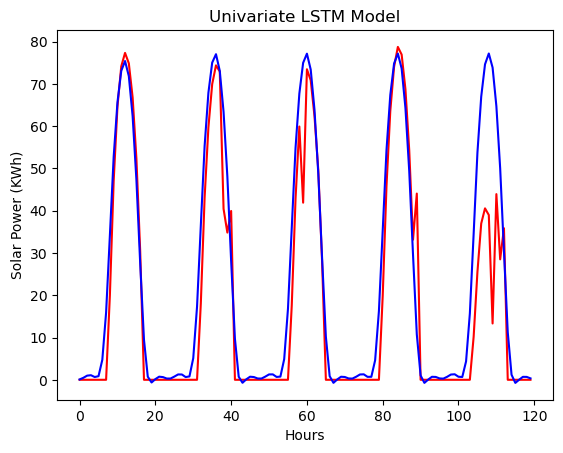

In [64]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')


# test-train split
train_data = df.iloc[:8400, 0:1].values
test_data = df.iloc[8400:8520, 0:1].values  # Next 120 hours

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create training sets
X_train = []
y_train = []
window_size = 360

for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled[i-window_size:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


model = Sequential()
model.add(LSTM(units=16, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

model.save('LSTM')

# Load the saved model
from keras.models import load_model
model = load_model('LSTM')

inputs = train_scaled[-window_size:]
inputs = inputs.reshape(-1, 1)
inputs = np.reshape(inputs, (1, inputs.shape[0], 1))

predictions = []
for _ in range(120):  # Predict next 120 hours
    prediction = model.predict(inputs)
    predictions.append(prediction[0, 0])
    inputs = np.roll(inputs, -1)
    inputs[0, -1, 0] = prediction

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Flatten the test data
test_data_flattened = test_data.flatten()
#This is just for picture that goes to a paper

hours_test = np.arange(len(test_data_flattened))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, test_data_flattened, color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Univariate LSTM Model')
plt.show()




In [65]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Calculate MAE
mae = mean_absolute_error(test_data, predictions)

# Calculate NMAE
#nmae = mae / 100
r2_test = r2_score(test_data, predictions)


non_zero_mask = test_data != 0
mape = np.mean(np.abs((test_data[non_zero_mask] - predictions[non_zero_mask]) / test_data[non_zero_mask])) * 100

print("RMSE:", rmse)
print("MAE:", mae)
#print("NMAE:", nmae)
print("R-Squared:", r2_test)
print(f"MAPE: {mape:.2f}")

RMSE: 11.659581325650265
MAE: 6.20727221060233
R-Squared: 0.8092135662525217
MAPE: 44.67


11.ARIMA-LSTM Univariate Model

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Epoch 1/30
263/263 [==============================] - 3s 3ms/step - loss: 0.9997
Epoch 2/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9991
Epoch 3/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9988
Epoch 4/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9988
Epoch 5/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9988
Epoch 6/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9987
Epoch 7/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9988
Epoch 8/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9988
Epoch 9/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9987
Epoch 10/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9989
Epoch 11/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9987
Epoch 12/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9987
Epoch 13/30
263/263 [====

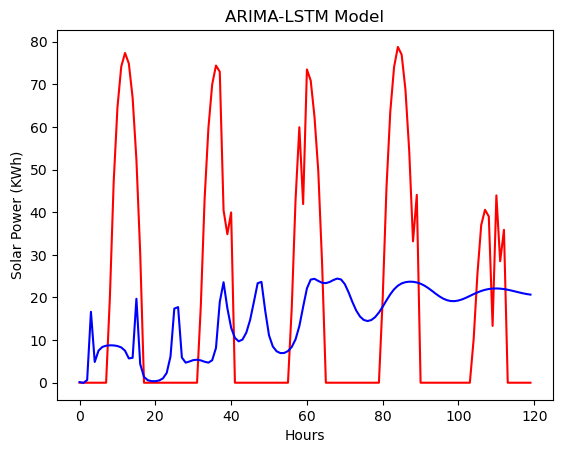

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
train_size = len(X) - 360
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train an ARIMA model
arima_model = ARIMA(y_train, order=(3, 0, 5))
arima_model_fit = arima_model.fit()

# Use the ARIMA model to forecast the future values
arima_forecast = arima_model_fit.forecast(steps=len(X_test))

# Reshape arima_forecast to match the shape of X_test
arima_forecast = arima_forecast.reshape(-1, 1)

# Append the ARIMA forecasts as additional features to X_test
X_test_augmented = np.hstack((X_test, arima_forecast))

# Use the ARIMA model to forecast the future values for the training data
arima_forecast_train = arima_model_fit.forecast(steps=len(X_train))

# Reshape arima_forecast_train to match the shape of X_train
arima_forecast_train = arima_forecast_train.reshape(-1, 1)

# Append the ARIMA forecasts as additional features to X_train
X_train_augmented = np.hstack((X_train, arima_forecast_train))

# Preprocessing
scaler_X = StandardScaler()
X_train_augmented = scaler_X.fit_transform(X_train_augmented)
X_test_augmented = scaler_X.transform(X_test_augmented)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape the input data for LSTM
X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape[0], 1, X_train_augmented.shape[1])
X_test_augmented = X_test_augmented.reshape(X_test_augmented.shape[0], 1, X_test_augmented.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=16, input_shape=(1, X_train_augmented.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_augmented, y_train, epochs=30, batch_size=32, verbose=1)

# Use the trained model to predict the output values for the first 24 hours of the test set
predictions = model.predict(X_test_augmented[:120])
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the y_test to get it back to the original scale
y_test = scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test[:120], predictions))
nmae = mean_absolute_error(y_test[:120], predictions) / 100
r2_test = r2_score(y_test[:120], predictions)

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r2_test:.2f}")


hours_test = np.arange(len(y_test[:120]))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[:120], color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('ARIMA-LSTM Model')
plt.show()

**D. 1 Day Ahead Forecasting**

1. Random Forest

RMSE: 3.01
MAE: 1.71
MAPE: 8.43


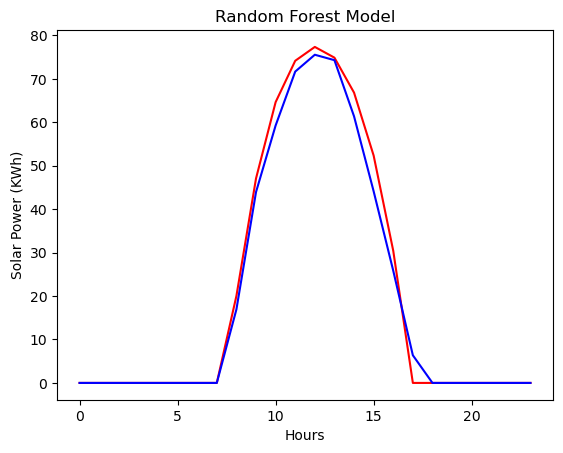

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define feature and target variables
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'


# Split the dataset into a training set and a test set
training_data = data[:-360]
testing_data = data[-360:-336]

# Split into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]
X_test = testing_data[feature_variables]
y_test = testing_data[target_variable]

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)

# Predict the next 360 hours based on the testing data
predictions = model.predict(X_test_scaled)

# DataFrame to store predictions
next360_predictions = pd.DataFrame(predictions, index=testing_data.index, columns=[target_variable])


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
#nmae = mae / np.mean(y_test)  # Normalized MAE

# Calculate MAPE
non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - predictions[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Print accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(y_test[:24]))
hours_predicted = np.arange(len(predictions[:24]))

plt.plot(hours_test, y_test[-24:], color='red')
plt.plot(hours_predicted, predictions[-24:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Random Forest Model')
plt.show()


2. Stacked LSTM (Multivariate)

1/1 [==============================] - 0s 361ms/step
MAPE: 10.58
RMSE: 3.44
MAE: 2.25


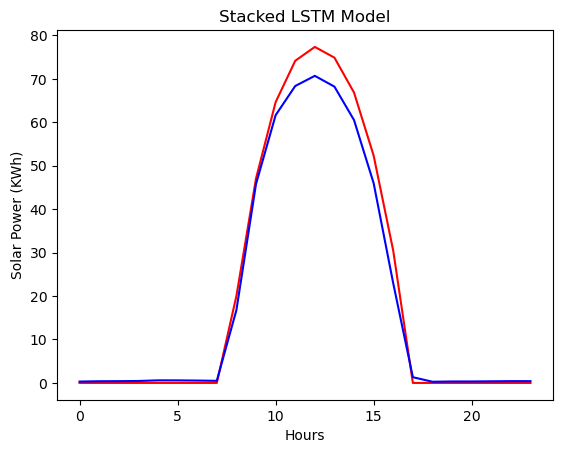

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)

# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")

hours_test = np.arange(len(testing_data[target_variable[-24:]]))
hours_predicted = np.arange(len(next360_predictions[target_variable[-24:]]))

plt.plot(hours_test, testing_data[target_variable][-24:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-24:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Stacked LSTM Model')
plt.show()




3. Stacked GRU Model

1/1 [==============================] - 0s 400ms/step
MAPE: 7.75
RMSE: 2.70
MAE: 1.83


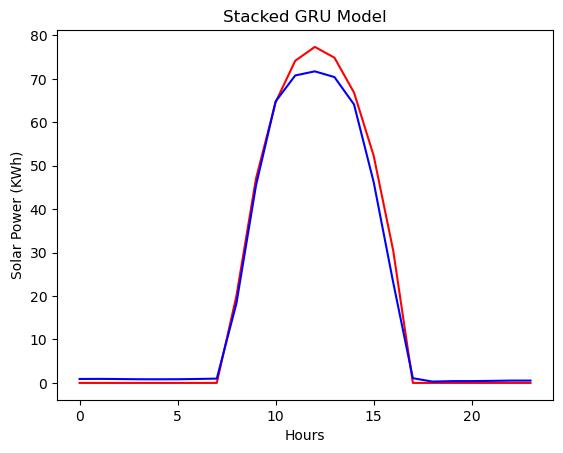

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]


# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))

model.add(GRU(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)



# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable][-24:]))
hours_predicted = np.arange(len(next360_predictions[target_variable][-24:]))

plt.plot(hours_test, testing_data[target_variable][-24:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-24:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Stacked GRU Model')
plt.show()


4. Encoder-Decoder LSTM

1/1 [==============================] - 0s 349ms/step
RMSE: 3.64
MAE: 2.37
MAPE: 10.88


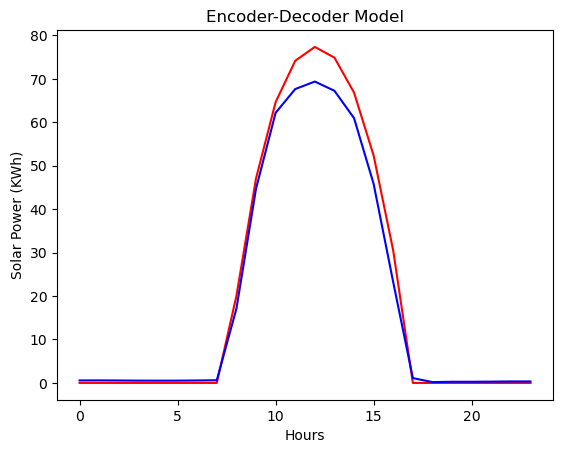

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define feature and target variables
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Split into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshape data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Create the Encoder-Decoder LSTM model
model = Sequential()
# Encoder
model.add(LSTM(16, activation='relu', input_shape=(1, len(feature_variables)), return_sequences=False))
model.add(RepeatVector(1))  # Replicate the encoder output for each time step in the output sequence
# Decoder
model.add(LSTM(16, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predict the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1, 1)  # Flatten predictions to 1D

# DataFrame to store predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")

#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable][-24:]))
hours_predicted = np.arange(len(next360_predictions[target_variable][-24:]))

plt.plot(hours_test, testing_data[target_variable][-24:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-24:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Encoder-Decoder Model')
plt.show()


5. Bi-Directional LSTM

1/1 [==============================] - 0s 351ms/step
MAPE: 8.87
RMSE: 3.40
MAE: 2.31


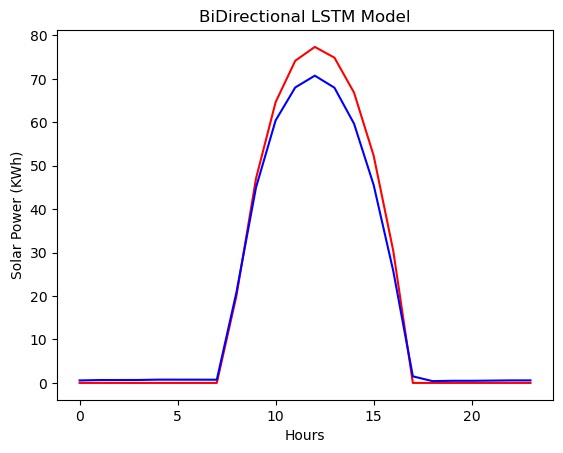

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]


# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(16, activation='relu', return_sequences=False), input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)



# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / 100
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


#fOR BETTER PLOT
hours_test = np.arange(len(testing_data[target_variable][-24:]))
hours_predicted = np.arange(len(next360_predictions[target_variable][-24:]))

plt.plot(hours_test, testing_data[target_variable][-24:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-24:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('BiDirectional LSTM Model')
plt.show()


6. Multivariate LSTM

1/1 [==============================] - 0s 225ms/step
MAPE: 11.14
RMSE: 4.34
MAE: 3.34


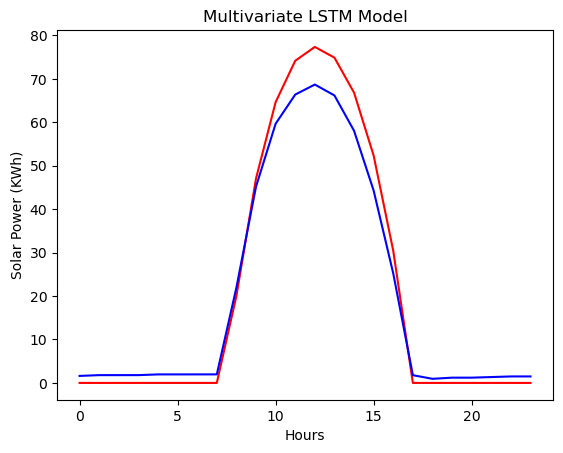

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')
# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)



# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])
#nmae = mae / 100


# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")

print(f"MAE: {mae:.2f}")
#print(f"NMAE: {nmae:.2f}")

hours_test = np.arange(len(testing_data[target_variable][-24:]))
hours_predicted = np.arange(len(next360_predictions[target_variable][-24:]))

plt.plot(hours_test, testing_data[target_variable][-24:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-24:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Multivariate LSTM Model')
plt.show()



7. GRU Model

1/1 [==============================] - 0s 193ms/step
MAPE: 10.96
RMSE: 4.14
MAE: 3.03


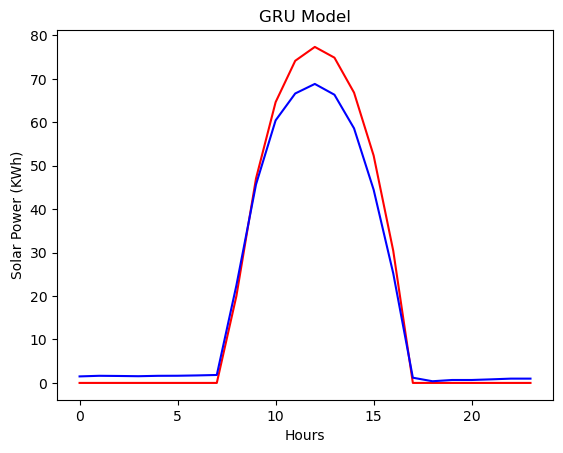

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamv.csv', parse_dates=['Date Time'], index_col='Date Time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the GRU model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=testing_data.index)


# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
#nmae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable]) / np.mean(testing_data[target_variable])
mae = mean_absolute_error(testing_data[target_variable], next360_predictions[target_variable])

# Calculate MAPE
non_zero_mask = testing_data[target_variable] != 0
mape = np.mean(np.abs((testing_data[target_variable][non_zero_mask] - next360_predictions[target_variable][non_zero_mask]) / testing_data[target_variable][non_zero_mask])) * 100

# Print MAPE
print(f"MAPE: {mape:.2f}")

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")



hours_test = np.arange(len(testing_data[target_variable][-24:]))
hours_predicted = np.arange(len(next360_predictions[target_variable][-24:]))

plt.plot(hours_test, testing_data[target_variable][-24:], color='red')
plt.plot(hours_predicted, next360_predictions[target_variable][-24:], color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('GRU Model')
plt.show()




8. ARIMA Univariate Model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64837.206, Time=9.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83469.536, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68189.189, Time=0.72 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75361.998, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87294.797, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=66450.474, Time=3.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64841.698, Time=5.10 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64841.915, Time=6.58 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=64739.208, Time=13.85 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66111.193, Time=6.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=64820.642, Time=15.95 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64728.981, Time=17.78 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=65923.978, Time=7.94 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=64735.069, Time=19.73 sec
 ARIMA(2,0,5)(0

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 output   No. Observations:                 8400
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -30897.413
Date:                Sun, 26 Nov 2023   AIC                          61814.827
Time:                        15:31:34   BIC                          61885.187
Sample:                    01-01-2010   HQIC                         61838.851
                         - 12-16-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1037      0.296     71.361      0.000      20.524      21.683
ar.L1          1.2647      1.504      0.841      0.400      -1.683       4.212
ar.L2          0.1228      2.749      0.045      0.9

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


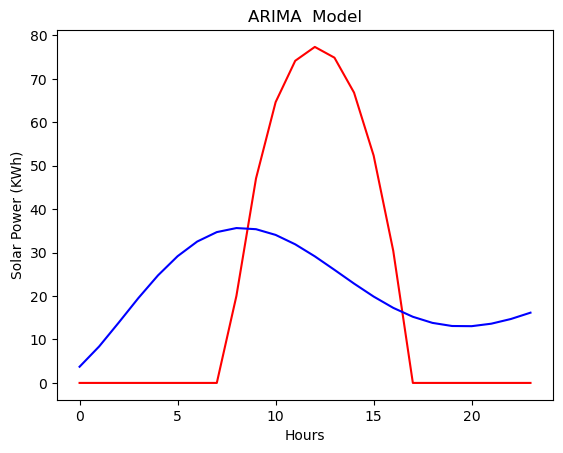

In [75]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data

df = pd.read_csv(r"C:\Users\ashis\Downloads\6\DProbabilistic forecasting\datamv.csv", usecols=[0, 1], index_col=0, parse_dates=[0], dayfirst=True)
df = pd.DataFrame(df['output'])

train = df.iloc[:8400, 0]
test = df.iloc[8400:, 0]

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)

#Decomp_results.plot()

#Decomp_results.seasonal.plot()

# Finding the Parameters (p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot_acf(train, lags=50)

#plot_pacf(train, lags=50)

from pmdarima import auto_arima

auto_arima(df, trace=True)

# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

A_Model = ARIMA(train, order=(3, 0, 5))

predictor = A_Model.fit()

predictor.summary()
print(predictor.summary())

# Predicting the first 120 hours
Predicted_results = predictor.predict(start=len(train), end=len(train) + 23, typ='levels')


nmae = np.mean(np.abs(Predicted_results - test[:24])) / 100
r2_test = r2_score(test[:24], Predicted_results)
#r_squared = 1 - (np.sum((test[:72] - Predicted_results) ** 2) / np.sum((test[:72] - np.mean(test[:72])) ** 2))
rmse = np.sqrt(mean_squared_error(test[:24], Predicted_results))
# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r2_test:.2f}")


hours_test = np.arange(len(test[:24]))
hours_predicted = np.arange(len(Predicted_results))

plt.plot(hours_test, test[:24], color='red')
plt.plot(hours_predicted, Predicted_results, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('ARIMA  Model')
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



#nmae = np.mean(np.abs(Predicted_results - test)) / 100

r_squared = 1 - (np.sum((test[:24] - Predicted_results)**2) / np.sum((test[:24] - np.mean(test[:24]))**2))


rmse = np.sqrt(mean_squared_error(test[:24], Predicted_results))

non_zero_mask = test != 0

mape = np.mean(np.abs((test[:24][non_zero_mask] - Predicted_results[non_zero_mask]) / test[:24][non_zero_mask])) * 100

mae = mean_absolute_error(test[:24], Predicted_results)

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
#print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r_squared:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 26.44
R-Squared: 0.21
MAPE: 56.18
MAE: 23.05


9. Univariate LSTM Model

Epoch 1/30
252/252 [==============================] - 25s 88ms/step - loss: 0.0495
Epoch 2/30
252/252 [==============================] - 29s 117ms/step - loss: 0.0118
Epoch 3/30
252/252 [==============================] - 29s 116ms/step - loss: 0.0102
Epoch 4/30
252/252 [==============================] - 29s 116ms/step - loss: 0.0095
Epoch 5/30
252/252 [==============================] - 29s 115ms/step - loss: 0.0092
Epoch 6/30
252/252 [==============================] - 29s 115ms/step - loss: 0.0088
Epoch 7/30
252/252 [==============================] - 29s 117ms/step - loss: 0.0084
Epoch 8/30
252/252 [==============================] - 29s 117ms/step - loss: 0.0083
Epoch 9/30
252/252 [==============================] - 30s 119ms/step - loss: 0.0083
Epoch 10/30
252/252 [==============================] - 29s 116ms/step - loss: 0.0081
Epoch 11/30
252/252 [==============================] - 29s 116ms/step - loss: 0.0081
Epoch 12/30
252/252 [==============================] - 29s 117ms/step - los

INFO:tensorflow:Assets written to: LSTM\assets


1/1 [==============================] - 0s 42ms/step


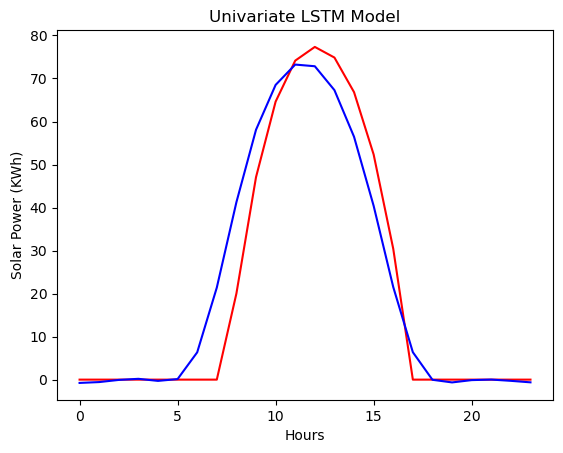

In [77]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')


# test-train split
train_data = df.iloc[:8400, 0:1].values
test_data = df.iloc[8400:8424, 0:1].values  # Next 24 hours

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create training sets
X_train = []
y_train = []
window_size = 360

for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled[i-window_size:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


model = Sequential()
model.add(LSTM(units=16, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

model.save('LSTM')

# Load the saved model
from keras.models import load_model
model = load_model('LSTM')

inputs = train_scaled[-window_size:]
inputs = inputs.reshape(-1, 1)
inputs = np.reshape(inputs, (1, inputs.shape[0], 1))

predictions = []
for _ in range(24):  # Predict next 24 hours
    prediction = model.predict(inputs)
    predictions.append(prediction[0, 0])
    inputs = np.roll(inputs, -1)
    inputs[0, -1, 0] = prediction

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Flatten the test data
test_data_flattened = test_data.flatten()
#This is just for picture that goes to a paper

hours_test = np.arange(len(test_data_flattened))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, test_data_flattened, color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('Univariate LSTM Model')
plt.show()




In [78]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Calculate MAE
mae = mean_absolute_error(test_data, predictions)

# Calculate NMAE
#nmae = mae / 100
r2_test = r2_score(test_data, predictions)


non_zero_mask = test_data != 0
mape = np.mean(np.abs((test_data[non_zero_mask] - predictions[non_zero_mask]) / test_data[non_zero_mask])) * 100

print("RMSE:", rmse)
print("MAE:", mae)
#print("NMAE:", nmae)
print("R-Squared:", r2_test)
print(f"MAPE: {mape:.2f}")

RMSE: 7.99771044186633
MAE: 4.923187224836834
R-Squared: 0.92782059639764
MAPE: 24.46


10. SVR Univariate Model

RMSE: 13.87
r-squared: 0.78
MAPE: 30.31
MAE: 11.43


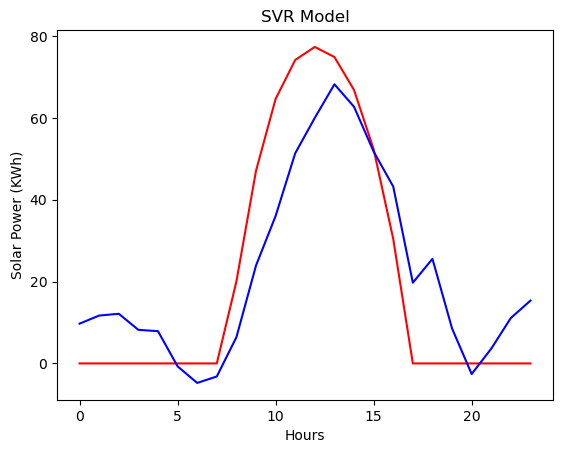

In [81]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

def create_dataset(X, y, time_steps=360):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

data = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')


target = 'output'


y = data[target].values

# Preprocessing
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

# test-train
train_data, test_data = y[:-360], y[-360:-336]

# Reshape the input data for SVR
time_steps = 360
X_train, y_train = create_dataset(train_data, train_data, time_steps)
y_test = test_data

# Flatten the training set for SVR
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(-1)

# Build the SVR model
model = SVR(kernel='poly', C=50, gamma=0.8, epsilon=0.5)


model.fit(X_train, y_train)

# Create a loop to iteratively predict each of the 24 time steps
predictions = model.predict(X_train[-1].reshape(1,-1))
for i in range(23):  
    new_pred = model.predict(np.append(X_train[-1][i+1:],predictions).reshape(1,-1))
    predictions = np.append(predictions, new_pred)


predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions) 
r2_test = r2_score(y_test, predictions)


non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - predictions[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"r-squared: {r2_test:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")


#This is for picture that goes to a paper

hours_test = np.arange(len(y_test))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[-24:], color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('SVR Model')
plt.show()


11. ARIMA-LSTM Model

C:\Users\ashis\Downloads\Anacondaa\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Epoch 1/30
263/263 [==============================] - 3s 3ms/step - loss: 0.9995
Epoch 2/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9991
Epoch 3/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9990
Epoch 4/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9989
Epoch 5/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9988
Epoch 6/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9987
Epoch 7/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9988
Epoch 8/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9988
Epoch 9/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9988
Epoch 10/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9987
Epoch 11/30
263/263 [==============================] - 1s 4ms/step - loss: 0.9989
Epoch 12/30
263/263 [==============================] - 1s 3ms/step - loss: 0.9987
Epoch 13/30
263/263 [====

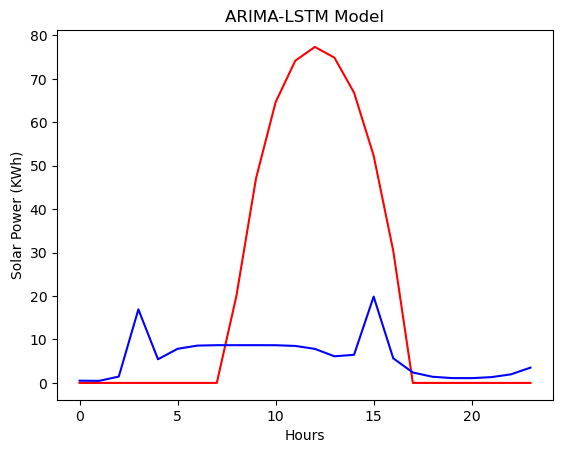

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ashis\Downloads\datamvMDPI - Copy.csv', parse_dates=['Date Time'], index_col='Date Time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
train_size = len(X) - 360
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train an ARIMA model
arima_model = ARIMA(y_train, order=(3, 0, 5))
arima_model_fit = arima_model.fit()

# Use the ARIMA model to forecast the future values
arima_forecast = arima_model_fit.forecast(steps=len(X_test))

# Reshape arima_forecast to match the shape of X_test
arima_forecast = arima_forecast.reshape(-1, 1)

# Append the ARIMA forecasts as additional features to X_test
X_test_augmented = np.hstack((X_test, arima_forecast))

# Use the ARIMA model to forecast the future values for the training data
arima_forecast_train = arima_model_fit.forecast(steps=len(X_train))

# Reshape arima_forecast_train to match the shape of X_train
arima_forecast_train = arima_forecast_train.reshape(-1, 1)

# Append the ARIMA forecasts as additional features to X_train
X_train_augmented = np.hstack((X_train, arima_forecast_train))

# Preprocessing
scaler_X = StandardScaler()
X_train_augmented = scaler_X.fit_transform(X_train_augmented)
X_test_augmented = scaler_X.transform(X_test_augmented)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape the input data for LSTM
X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape[0], 1, X_train_augmented.shape[1])
X_test_augmented = X_test_augmented.reshape(X_test_augmented.shape[0], 1, X_test_augmented.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=16, input_shape=(1, X_train_augmented.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_augmented, y_train, epochs=30, batch_size=32, verbose=1)

# Use the trained model to predict the output values for the first 24 hours of the test set
predictions = model.predict(X_test_augmented[:24])
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the y_test to get it back to the original scale
y_test = scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test[:24], predictions))
nmae = mean_absolute_error(y_test[:24], predictions) / 100
r2_test = r2_score(y_test[:24], predictions)

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r2_test:.2f}")


hours_test = np.arange(len(y_test[:24]))
hours_predicted = np.arange(len(predictions))

plt.plot(hours_test, y_test[:24], color='red')
plt.plot(hours_predicted, predictions, color='blue')
plt.xlabel('Hours')
plt.ylabel('Solar Power (KWh)')
plt.title('ARIMA-LSTM Model')
plt.show()